[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/geo-di-lab/emerge-lessons/blob/main/docs/ch4/lesson5.ipynb)

# Summary Statistics by County

Write the name of your county in the quotes below. For example, `county = "Broward County"` or `county = "Miami-Dade County"`

In [ ]:
county_name = "Broward County"

In [ ]:
import geopandas as gpd
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns

First, load 1) the GLOBE Mosquito Habitat Mapper data, and 2) a file with the Florida county boundaries from the [U.S. Census](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html), which will be used to filter the data to each county.

In [ ]:
data = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/globe_mosquito.zip')
fl = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/florida_counties.geojson')

Then, get the geographic boundaries of your county.

In [ ]:
county = fl.loc[fl['NAMELSAD'] == county_name]

Now, we use those boundaries to filter for all GLOBE points within your county, from 2018 tp 2024.

In [ ]:
data_county = data.sjoin(county, how="inner", predicate="within")

num_total = len(data_county)

print(f"There were {num_total} GLOBE points recorded within {county_name} from 2018-2024 by community scientists.")

num_eliminated = len(data_county[data_county['BreedingGroundEliminated'] == 'true'])
print(f"Of those points, {num_eliminated} ({round(num_eliminated * 100 / num_total)}%) were successfully mitigated by the community scientists, which reduces the risk for mosquitoes at that location in the future.")

There were 43 GLOBE points recorded within Broward County from 2018-2024 by community scientists.
Of those points, 26 (60%) were successfully mitigated by the community scientists, which reduces the risk for mosquitoes at that location in the future.


In [ ]:
data_county.head()

,CountryCode,CountryName,Elevation,AbdomenCloseupPhotoUrls,BreedingGroundEliminated,Comments,DataSource,ExtraData,Genus,GlobeTeams,LarvaFullBodyPhotoUrls,LarvaeCount,LastIdentifyStage,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MosquitoAdults,MosquitoEggs,MosquitoHabitatMapperId,MosquitoPupae,Species,Userid,WaterSource,WaterSourcePhotoUrls,WaterSourceType,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,LarvaeCountProcessed,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER
6640,USA,United States,-0.4,None,true,When I went kayaking I saw sum in like the tre...,GLOBE Observer App,LarvaeVisibleNo,None,[WileyCollegeBIOL1422],None,0,None,5,automatic,2023-03-30 02:01:00,0,26.1638,-80.1253,None,None,42851,false,None,103027879,"puddle or still water next to a creek, stream ...",https://data.globe.gov/system/photos/2023/03/3...,flowing: still water found next to river or st...,17043304,United States of America Citizen Science,mosquito_habitat_mapper,314904,17RNJ874941,2023-03-30,0.0,POINT (-80.12548 26.16364),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277
28671,USA,United States,4.7,None,false,None,GLOBE Observer App,None,None,[SEES2019],None,0,identify,None,None,2019-08-24 11:27:00,0,26.3255,-80.1897,false,false,15439,false,None,57838002,"puddle, vehhicle or animal tracks",https://data.globe.gov/system/photos/2019/08/2...,still: lake/pond/swamp,17043304,United States of America Citizen Science,mosquito_habitat_mapper,160462,17RNK808119,2019-08-24,0.0,POINT (-80.1904 26.32473),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277
29021,USA,United States,4.7,None,false,None,GLOBE Observer App,None,None,[SEES2019],None,None,identify,None,None,2019-08-14 19:06:00,0,26.3255,-80.1897,None,None,15169,false,None,57838002,"puddle, vehhicle or animal tracks",https://data.globe.gov/system/photos/2019/08/1...,still: lake/pond/swamp,17043304,United States of America Citizen Science,mosquito_habitat_mapper,160462,17RNK808119,2019-08-14,NaN,POINT (-80.1904 26.32473),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277
29392,USA,United States,4.7,None,false,None,GLOBE Observer App,None,None,[SEES2019],None,None,identify,None,None,2019-08-04 16:29:00,0,26.3257,-80.1900,None,None,14785,false,None,57838002,adult mosquito trap,https://data.globe.gov/system/photos/2019/08/0...,container: artificial,17043304,United States of America Citizen Science,mosquito_habitat_mapper,160293,17RNK808120,2019-08-04,NaN,POINT (-80.1904 26.32564),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277
29406,USA,United States,4.7,None,false,None,GLOBE Observer App,None,None,[SEES2019],None,None,identify,None,None,2019-08-04 16:28:00,0,26.3254,-80.1899,None,None,14783,false,None,57838002,adult mosquito trap,https://data.globe.gov/system/photos/2019/08/0...,container: artificial,17043304,United States of America Citizen Science,mosquito_habitat_mapper,160462,17RNK808119,2019-08-04,NaN,POINT (-80.1904 26.32473),57,12,011,00295753,0500000US12011,12011,Broward,Broward County,FL,Florida,06,3115495915,273317277


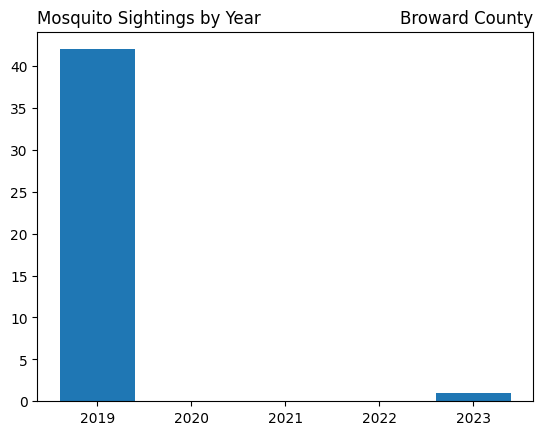

In [ ]:
# Add a new column for year
data_county['MeasuredYear'] = data_county['MeasuredAt'].dt.year

# Make histogram of mosquito sightings each year
years = data_county[['SiteId', 'MeasuredYear']].groupby('MeasuredYear', as_index=False).count()
plt.bar(years['MeasuredYear'], years['SiteId'])
plt.title("Mosquito Sightings by Year", loc = 'left')
plt.title(county_name, loc = 'right')
plt.show()

Let's make a pie chart of the water source types (both general and specific) where mosquitoes were reported in this county.

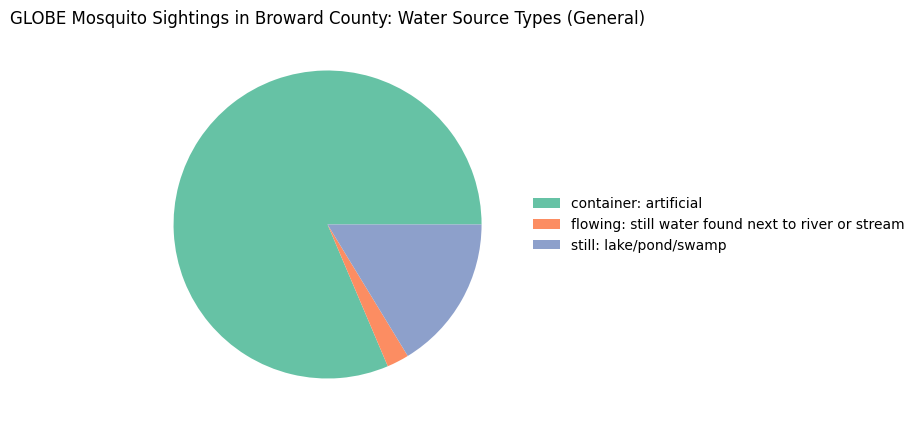

In [ ]:
types = data_county[['SiteId', 'WaterSourceType']].groupby('WaterSourceType', as_index=False).count()

plt.figure(figsize=(5, 5))
patches, texts = plt.pie(x = types['SiteId'],
                         colors = sns.color_palette('Set2'))
plt.title(f"GLOBE Mosquito Sightings in {county_name}: Water Source Types (General)")
plt.legend(patches, types['WaterSourceType'],
           loc = 'center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

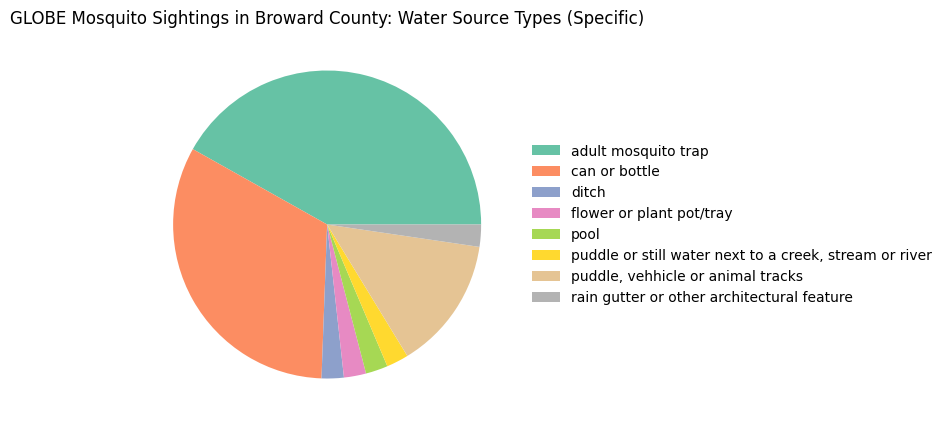

In [ ]:
types = data_county[['SiteId', 'WaterSource']].groupby('WaterSource', as_index=False).count()

plt.figure(figsize=(5, 5))
patches, texts = plt.pie(x = types['SiteId'],
                         colors = sns.color_palette('Set2'))
plt.title(f"GLOBE Mosquito Sightings in {county_name}: Water Source Types (Specific)")
plt.legend(patches, types['WaterSource'],
           loc = 'center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()